# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [150]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Now let's hack the rotated CAPTCHA!

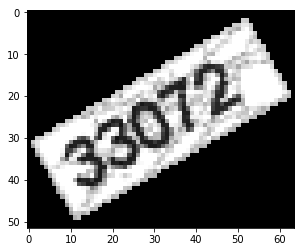

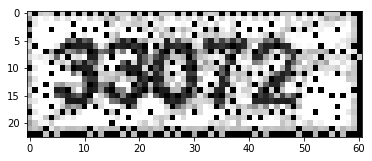

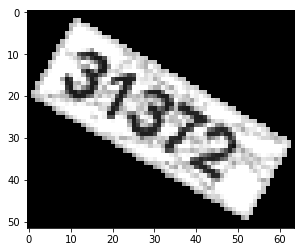

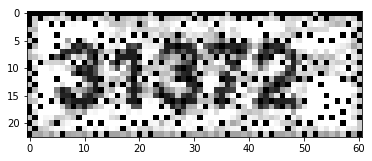

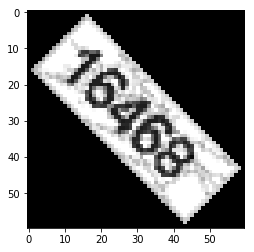

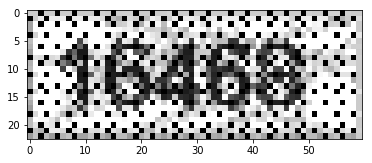

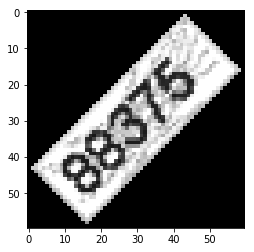

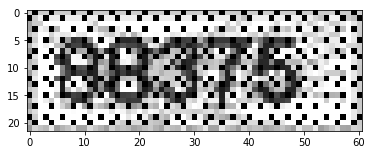

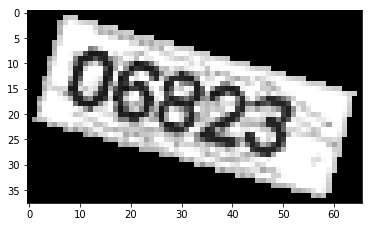

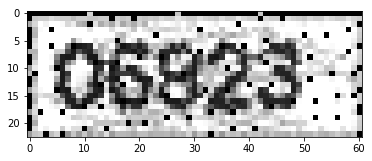

In [292]:
from hack_pca import hack_pca
np.set_printoptions(threshold=np.inf)
# Hack different images yourself
img = hack_pca('1.gif')
img = hack_pca('2.gif')
img = hack_pca('3.gif')
img = hack_pca('4.gif')
img = hack_pca('5.gif')

## Apply PCA on face image

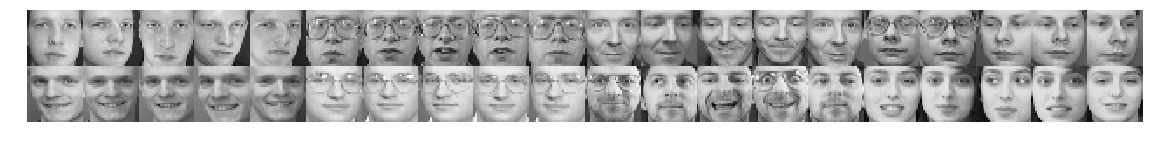

In [346]:
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer

# end answer
from show_face import show_face
show_face(fea_Train)

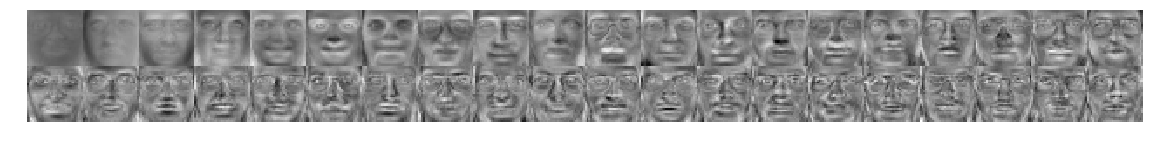

In [299]:
# 2. Run PCA
# begin answer
from show_face import show_face
from pca import PCA
vector, value = PCA(fea_Train)
# end answer
# 3. Visualize eigenface
# begin answer
show_face(vector.T)
# end answer

d = 8, test error = 0.245


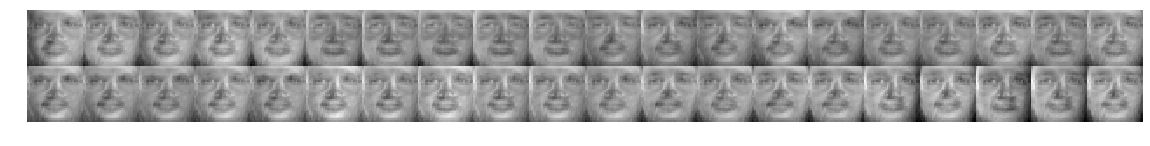

d = 16, test error = 0.19999999999999996


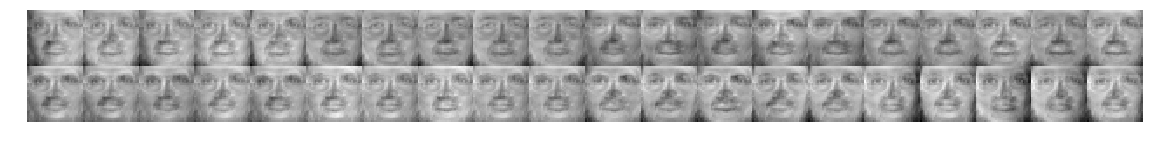

d = 32, test error = 0.18000000000000005


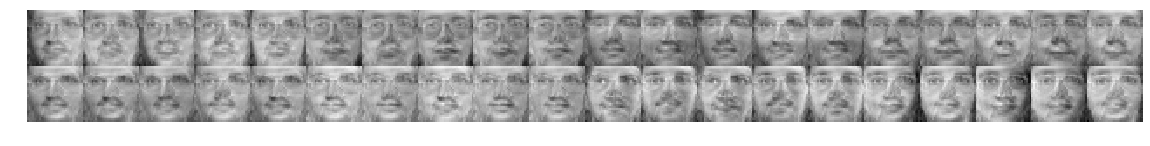

d = 64, test error = 0.15000000000000002


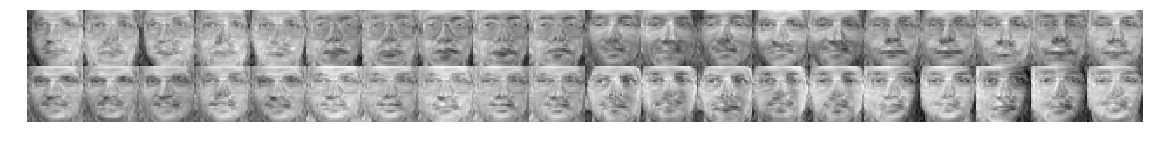

d = 128, test error = 0.15000000000000002


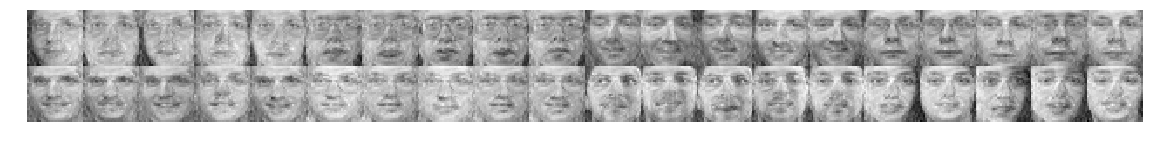

In [340]:
# 4. Project data on to low dimensional space
# begin answer
from knn import knn
train_vector, train_value = PCA(fea_Train)

# end answer

# 5. Run KNN in low dimensional space
# begin answer
ds = [8, 16, 32, 64, 128]
for i in ds:
    train_vec = np.vstack([train_vector[:,j] for j in range(i)]).T
    fea = np.dot(fea_Train, train_vec)
    f_test = np.dot(fea_Test, train_vec)
    gnd = knn(f_test, fea, gnd_Train, 1)
    err = 1 - np.sum(np.array(gnd)==np.array(gnd_Test))/len(gnd_Test)
    print('d = {}, test error = {}'.format(i, err))
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    fea = np.array(np.dot(f_test, train_vec.T))
    show_face(fea)
# end answer  

## You are encouraged to apply LDA on this dataset!

In [355]:
from LDA import LDA

# 4. Project data on to low dimensional space
# begin answer
from knn import knn
train_vector, train_value = LDA(fea_Train, gnd_Train)

# end answer

# 5. Run KNN in low dimensional space
# begin answer
ds = [8,16,32,39]
for i in ds:
    train_vec = np.vstack([train_vector[:,j] for j in range(i)]).T
    fea = np.dot(fea_Train, train_vec)
    f_test = np.dot(fea_Test, train_vec)
    gnd = knn(f_test, fea, gnd_Train, 1)
    err = 1 - np.sum(np.array(gnd)==np.array(gnd_Test))/len(gnd_Test)
    print('d = {}, test error = {}'.format(i, err))
# end answer
# 6. Recover face images form low dimensional space, visualize them
# begin answer
    fea = np.array(np.dot(f_test, train_vec.T))
# end answer  

d = 8, test error = 0.13
d = 16, test error = 0.04500000000000004
d = 32, test error = 0.04500000000000004
d = 39, test error = 0.040000000000000036


In [354]:
# Your code here
# begin answer
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
ld, _ = LDA(fea_Train, gnd_Train)
ld = np.real(ld)

f = False
for d in ds:
    if d > ld.shape[1]:
        d = ld.shape[1]
        f = True
    
    print("dimensionality = {}:".format(d))
    lowTrain = np.matmul(fea_Train, ld[:, :d])
    lowTest = np.matmul(fea_Test, ld[:, :d])
    
    y = knn(lowTest, lowTrain, gnd_Train, 1)
    print("testing error rate = {}".format(np.sum(y != gnd_Test) / y.shape[0]))
    
    if f:
        break
# end answer


dimensionality = 39:
testing error rate = 0.04
